https://towardsdatascience.com/graph-visualisation-basics-with-python-part-ii-directed-graph-with-networkx-5c1cd5564daa

https://medium.com/towards-data-science/graph-visualisation-basics-with-python-part-iii-directed-graphs-with-graphviz-50116fb0d670

In [1]:
import pandas as pd
import graphviz
import networkx as nx

In [2]:
df = pd.read_csv("message_workflow.csv")
df

,Nodes,Labels,Edge Labels,Shapes,Colors
0,A1,Define Region and Case to be loaded.,NaN,oval,mistyrose
1,A2,Button: Reload Global (Main Sheet)\n\nAction: ...,NaN,box,skyblue
2,A3,Button: Run (ReportGen-Annual sheet)​ with Opt...,\intm\Region_Case.MPS file (matrix problem),box,skyblue
3,A4,Button: Run (ReportGen-Annual sheet)​\nRun Opt...,\intm\Region_Case_lin.sol file (solution file),box,skyblue
4,A5,Button: Run (ReportGen-Annual sheet)​ with Opt...,\res\Region_Case.TAB (results table),box,skyblue
5,A6,Button: Get Results (ReportGen-Annual sheet)​\...,NaN,box,skyblue
6,A7,Get results in same sheet or separate excel or...,NaN,oval,mistyrose


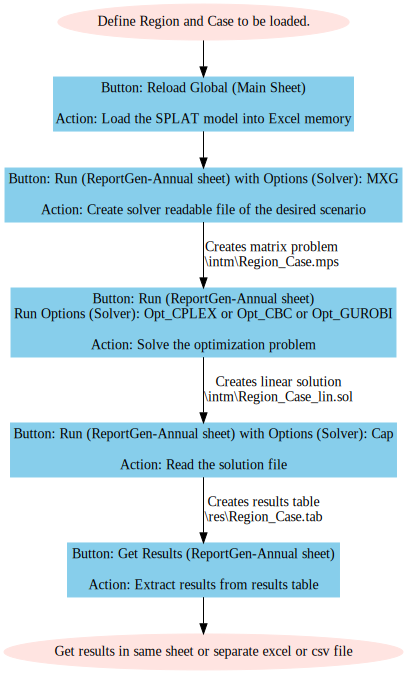

In [3]:
g = graphviz.Digraph(filename = "message_workflow.gv")

nodes = df["Nodes"].tolist()
node_labels = df["Labels"].tolist()
shapes = df["Shapes"].tolist()
colors = df["Colors"].tolist()

for node, node_label, shape, color in zip(nodes, node_labels, shapes, colors):
    g.node(node, node_label, shape = shape, color = color, style = "filled")

g.edge("A1", "A2")
g.edge("A2", "A3")
g.edge("A3", "A4", label = "Creates matrix problem\n \\\\intm\\\\Region_Case.mps")
g.edge("A4", "A5", label = "Creates linear solution\n \\\\intm\\\\Region_Case_lin.sol")
g.edge("A5", "A6", label = "Creates results table\n \\\\res\\\\Region_Case.tab")
g.edge("A6", "A7")

g

In [4]:
g.view()

'message_workflow.gv.pdf'

In [5]:
g.render("message_workflow.png")

'message_workflow.png.pdf'

In [6]:
print (g.source)

digraph {
	A1 [label="Define Region and Case to be loaded." color=mistyrose shape=oval style=filled]
	A2 [label="Button: Reload Global (Main Sheet)

Action: Load the SPLAT model into Excel memory" color=skyblue shape=box style=filled]
	A3 [label="Button: Run (ReportGen-Annual sheet)​ with Options (Solver): MXG ​

Action: Create solver readable file of the desired scenario " color=skyblue shape=box style=filled]
	A4 [label="Button: Run (ReportGen-Annual sheet)​
Run Options (Solver): Opt_CPLEX or Opt_CBC or Opt_GUROBI 

Action: Solve the optimization problem" color=skyblue shape=box style=filled]
	A5 [label="Button: Run (ReportGen-Annual sheet)​ with Options (Solver): Cap 

Action: Read the solution file" color=skyblue shape=box style=filled]
	A6 [label="Button: Get Results (ReportGen-Annual sheet)​

Action: Extract results from results table​" color=skyblue shape=box style=filled]
	A7 [label="Get results in same sheet or separate excel or csv file" color=mistyrose shape=oval style=fille